# Спектрометрический гамма-метод

In [163]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from seaborn import distplot
import math
import scipy.linalg as la
from scipy.linalg import inv
from sympy.solvers import solve



Подгружаем библиотеки

In [164]:
K = pd.read_csv('K.csv', sep=",", names =['K'])
Th = pd.read_csv('Th.csv',sep=",",names =['Th'])
U = pd.read_csv('U.csv',sep=",",names =['U'])
quest = pd.read_csv('quest.csv',sep=";")

Читаю файлы, добавляю для спектров K,Th,U соответствующие наименования

In [165]:
K

,K
0,1.82
1,2.99
2,3.66
3,5.25
4,4.88
...,...
1019,0.00
1020,0.00
1021,0.00
1022,0.00


In [166]:
Th

,Th
0,9.83
1,19.10
2,22.70
3,25.80
4,33.40
...,...
1019,0.00
1020,0.00
1021,0.00
1022,0.00


In [167]:
U

,U
0,7.19
1,14.40
2,20.20
3,23.90
4,26.20
...,...
1019,0.00
1020,0.00
1021,0.00
1022,0.00


In [168]:
quest

,2.5,7.5,12.5,17.5,22.5,27.5,32.5,37.5,42.5,47.5,...,212.5,217.5,222.5,227.5,232.5,237.5,242.5,247.5,252.5,257.5
0,0.675237,0.675237,0.675237,2.700946,3.376183,1.350473,2.025710,4.051419,5.401892,5.401892,...,7.427602,4.051419,4.051419,4.051419,2.025710,0.675237,1.350473,2.025710,0.675237,0.000000
1,4.559822,2.442293,3.148136,4.828269,3.741347,5.178742,3.091820,8.301169,8.950696,12.732666,...,13.454201,6.889482,7.595326,6.183639,3.091820,1.736450,4.884585,3.091820,2.442293,0.705843
2,4.710740,3.828269,2.649527,1.470785,6.774068,5.153033,6.774068,7.802560,13.694157,15.912187,...,18.847190,11.632944,4.562604,5.447190,4.564719,3.534112,1.764942,4.564719,6.774068,4.712855
3,7.190651,2.588314,0.527101,4.602337,4.409572,5.153033,7.477796,7.214246,17.760267,22.362604,...,24.447412,11.806900,7.637284,4.385977,5.153033,4.889482,6.903506,6.687145,6.710740,7.717752
4,7.447190,3.656539,5.583639,4.588314,7.080134,9.141347,7.355481,8.011909,21.882805,23.139232,...,26.562827,17.916082,8.534669,7.313077,3.557707,4.355370,6.882471,5.618920,3.790651,2.661213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1021,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1022,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Объединим все спектры в одну таблицу, чтобы построить все спектры на одном графике

In [169]:
S=[K,Th,U]
S=pd.concat([K,Th,U],axis = 1, sort = False)


In [170]:
S

,K,Th,U
0,1.82,9.83,7.19
1,2.99,19.10,14.40
2,3.66,22.70,20.20
3,5.25,25.80,23.90
4,4.88,33.40,26.20
...,...,...,...
1019,0.00,0.00,0.00
1020,0.00,0.00,0.00
1021,0.00,0.00,0.00
1022,0.00,0.00,0.00


<AxesSubplot:>

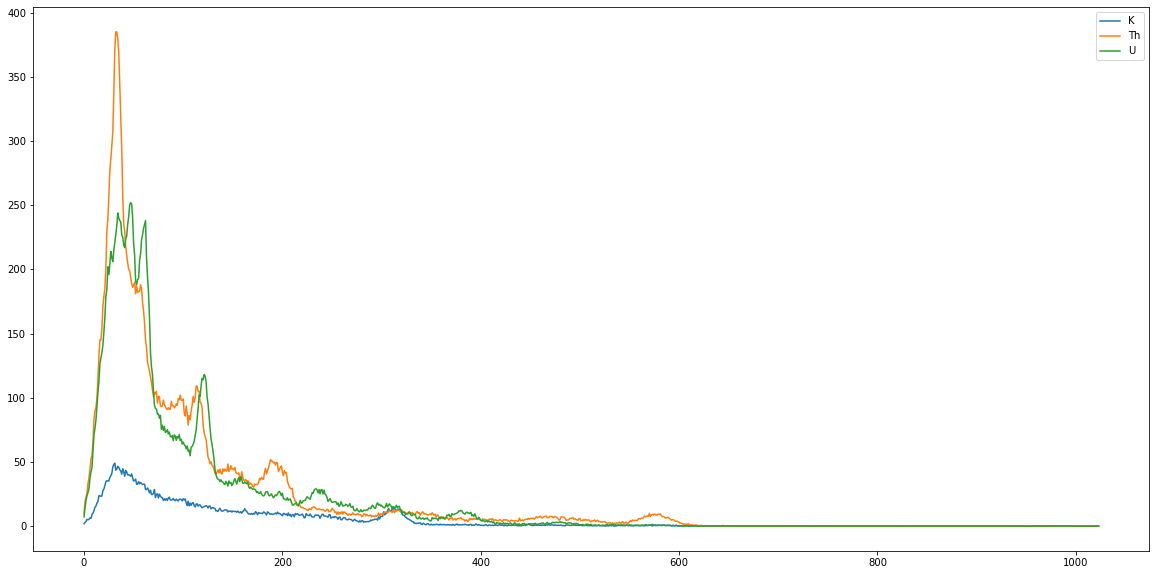

In [171]:
S.plot(figsize=(20,10))

Далее, по формуле 2.4 выполняю умножение соответствующих матриц, а результат представляю в виде пандас-таблицы

In [187]:
C=np.dot(la.inv(np.dot(S.T,S)),np.dot((S.T),quest))
C_df=pd.DataFrame(C)
C_df.index=['K','Th','U']
C_df

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
K,0.599663,0.708648,0.719124,0.683494,0.614282,0.659888,0.699274,0.550961,0.102734,-0.034599,...,0.079364,0.427177,0.589953,0.621860,0.604769,0.711231,0.697174,0.679505,0.632181,0.795028
Th,0.027924,0.025840,0.014496,0.026600,0.026475,0.010820,0.000113,-0.030445,0.030059,0.013787,...,0.688224,0.452463,0.215091,0.120976,0.020639,0.036964,0.038998,0.015071,0.025318,0.003318
U,0.022717,0.011373,0.019626,0.027578,0.052641,0.093504,0.172243,0.360514,0.632083,0.836857,...,0.084870,0.026709,0.046250,0.015340,0.039954,-0.003667,-0.005168,0.030945,0.025463,0.023819


Теперь разбиваю исследуемый керн на блоки по 12 см и отмечаю это на графике с результатами. В зависисости от того, спектр какого элемента будет иметь наибольшее значение, делаю вывод о соответствующем элементе (K,Th,U)

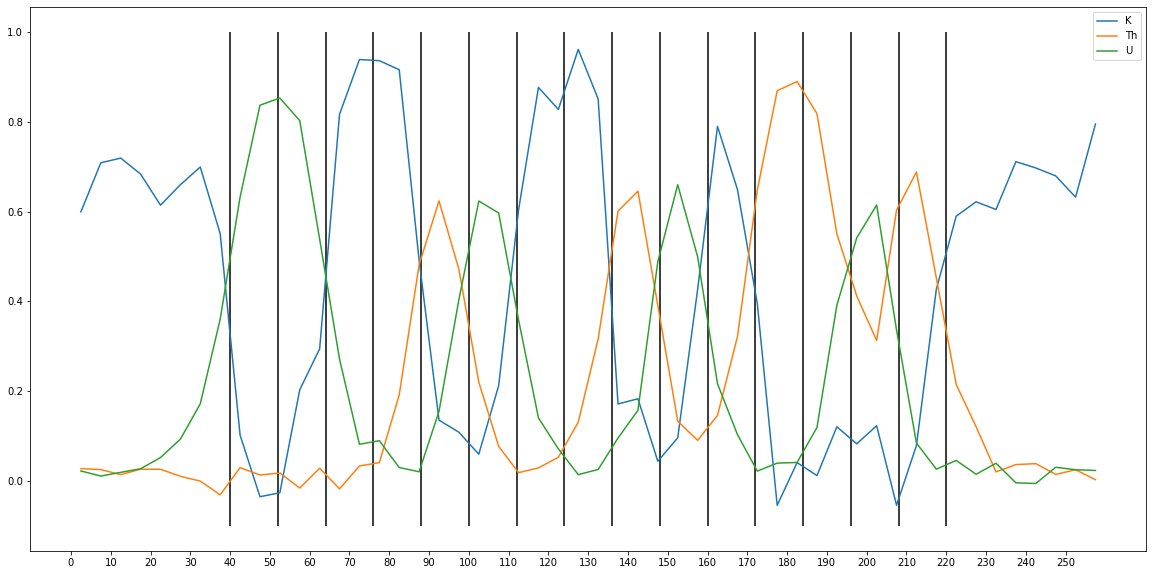

In [161]:
x = [i+0.5 for i in range(2,261,5)]
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xticks(np.arange(0, 260, 10))
ax.vlines(
x=np.arange(40, 221, 12),
ymin=-0.1, ymax=1,
colors='black')
plt.plot(x,C_df.iloc[0],label='K')
plt.plot(x,C_df.iloc[1], label='Th')
plt.plot(x,C_df.iloc[2], label='U')
plt.legend()

Беру максимальное значение для каждого шага измерений и записываю результат в таблицу. Соответственно, по первому столбцу, таблицы можно делать выводы, каким элементом представлен образец

In [185]:
max_ = pd.DataFrame(
    {'Элемент': C_df.idxmax(axis=0), 
    'Концентрация': C_df.max(axis=0)
    })
max_.index=[i+0.5 for i in range(2,261,5)]
max_

,Элемент,Концентрация
2.5,K,0.599663
7.5,K,0.708648
12.5,K,0.719124
17.5,K,0.683494
22.5,K,0.614282
27.5,K,0.659888
32.5,K,0.699274
37.5,K,0.550961
42.5,U,0.632083
47.5,U,0.836857
